In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# filtering the data for data analyst
df_DA=df[df['job_title_short']== 'Data Analyst'].copy()

In [2]:
df_exploded= df.explode('job_skills')

skills_stats=df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg', 'median')
)

#list top skills
skill_count=20
skills_stats=skills_stats.sort_values(by='skill_count', ascending=False).head(skill_count)
skills_stats

,skill_count,median_salary
job_skills,,
sql,384849,120000.0
python,380909,125000.0
aws,145381,135000.0
azure,132527,125000.0
r,130892,119550.0
tableau,127213,111175.0
excel,127018,92500.0
spark,114609,140000.0
power bi,98147,102000.0


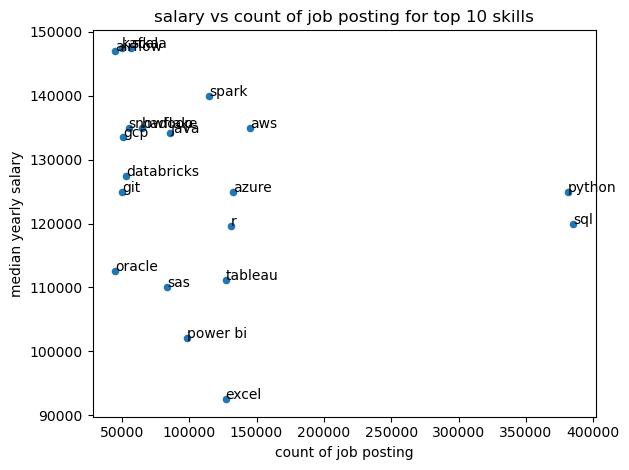

In [3]:
skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('count of job posting')
plt.ylabel('median yearly salary')
plt.title('salary vs count of job posting for top 10 skills')
plt.tight_layout()

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)
    
plt.show()


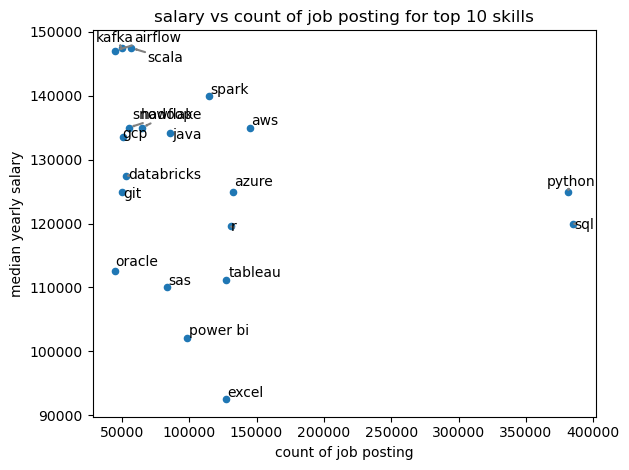

In [6]:
from adjustText import adjust_text

skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
texts=[]
for i, txt in enumerate(skills_stats.index):
    texts.append(plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt))
    
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey',lw=1.5))
plt.xlabel('count of job posting')
plt.ylabel('median yearly salary')
plt.title('salary vs count of job posting for top 10 skills')
plt.tight_layout()


    
plt.show()

In [7]:
df_DA_IND=df[(df['job_title_short']== 'Data Analyst') & (df['job_country']=='India')].copy()

(0.0, 250000.0)

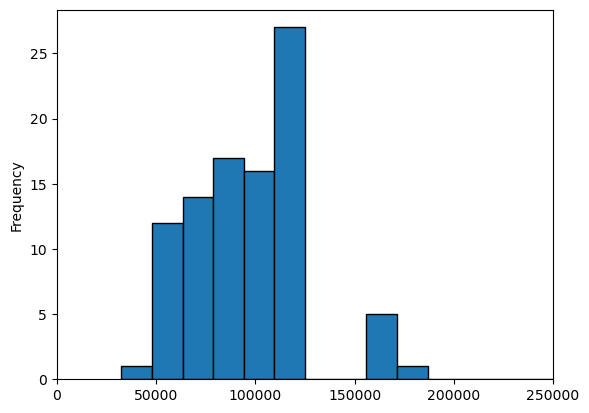

In [8]:
df_DA_IND['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000)

In [10]:
df_DA_IND=df_DA_IND.dropna(subset=['salary_year_avg'])

In [11]:
df_DA_IND['salary_year_avg'].sample(10)

305374     79200.0
597416    111175.0
61483     105000.0
768056     64800.0
55883      79200.0
610349    111175.0
27487     165000.0
483120    111175.0
380987     79200.0
402960     98500.0
Name: salary_year_avg, dtype: float64

<Axes: >

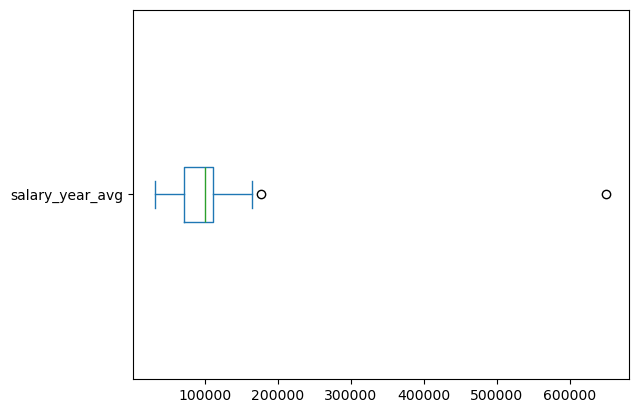

In [13]:
df_DA_IND['salary_year_avg'].plot(kind='box', vert=False)

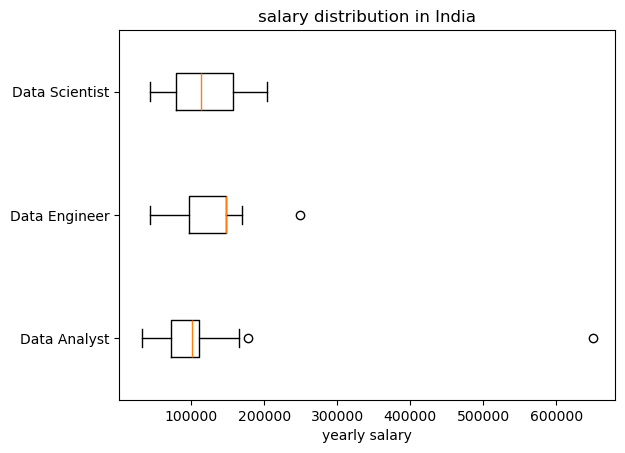

In [24]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_IND=df[(df['job_title_short'].isin(job_titles))& (df['job_country']=='India')].copy()

df_IND=df_IND.dropna(subset=['salary_year_avg'])

job_list=[df_IND[df_IND['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('salary distribution in India')
plt.xlabel('yearly salary')
plt.show()